In [427]:
import pandas as pd

data = pd.read_csv("./data/dataset.csv", usecols=['energy', 'valence', 'tempo'])
subset = data.sample(1000)

In [428]:
print(len(subset))
display(subset.head(10))

1000


,energy,valence,tempo
18777,0.887,0.421,131.207
102905,0.447,0.662,90.013
48461,0.832,0.375,195.091
65438,0.898,0.879,121.967
17675,0.625,0.861,129.970
113070,0.581,0.326,147.708
19130,0.643,0.397,135.962
62296,0.706,0.479,114.842
57429,0.550,0.720,109.952
70003,0.659,0.492,176.018


## Plot Subset

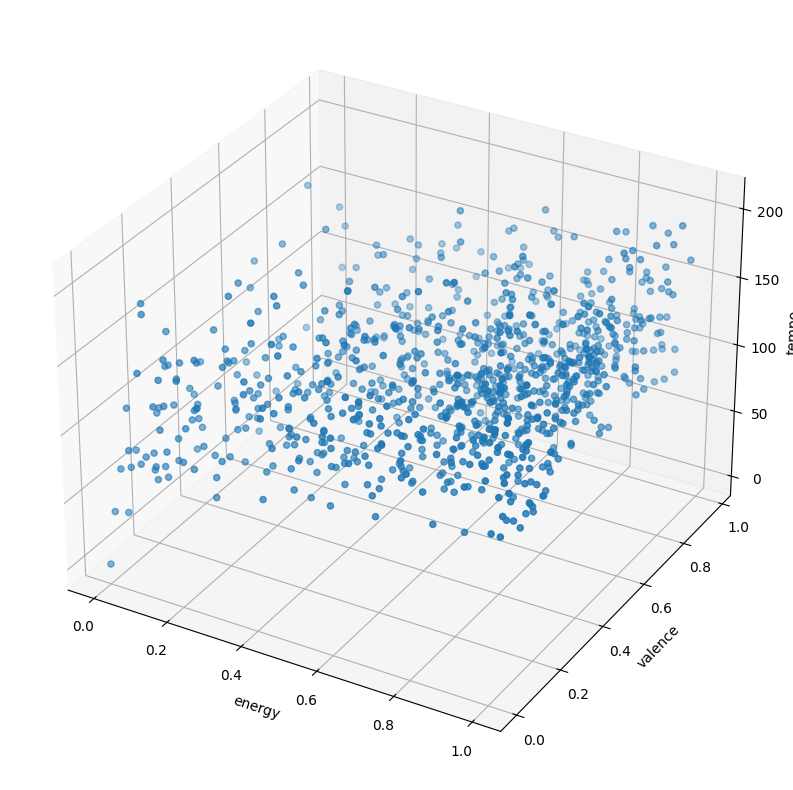

In [429]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection="3d")

ax.scatter(subset['energy'], subset['valence'], subset['tempo'])


ax.set_xlabel('energy')
ax.set_ylabel('valence')
ax.set_zlabel('tempo')

plt.show()

## Training und Test Split

In [430]:
from sklearn.model_selection import train_test_split
#TODO

## Normalizing the data (Min Max Norming)

In [431]:
from sklearn import preprocessing

norm_subset = subset

norm_subset = (norm_subset - norm_subset.min()) / (norm_subset.max() - norm_subset.min())
norm_subset.head(10)
X_train_norm = norm_subset


### Plot normalized Data

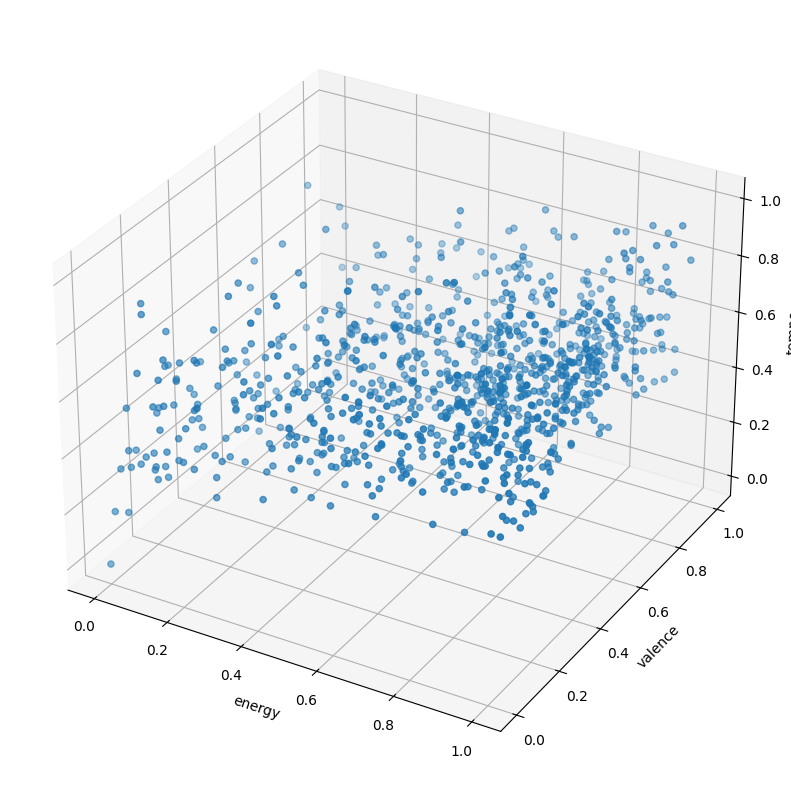

In [432]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection="3d")

ax.scatter(norm_subset['energy'], norm_subset['valence'], norm_subset['tempo'])

ax.set_xlabel('energy')
ax.set_ylabel('valence')
ax.set_zlabel('tempo')

plt.show()

## Fitting and evaluating the model

In [435]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 10, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=10, random_state=0)

## Visualize model

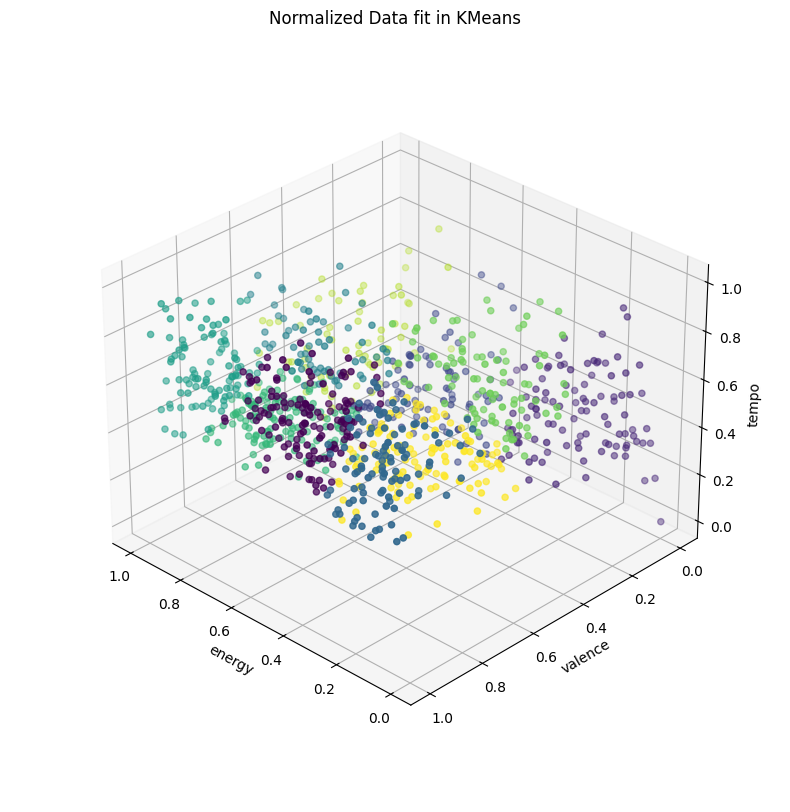

In [436]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection="3d",elev=30, azim=134)
labels = kmeans.labels_


ax.scatter(X_train_norm['valence'], X_train_norm['energy'], X_train_norm['tempo'] ,c=labels)

ax.set_xlabel("energy")
ax.set_ylabel("valence")
ax.set_zlabel("tempo")
ax.set_title("Normalized Data fit in KMeans")
ax.set_box_aspect(None, zoom=0.85)

plt.show()

# Fragen

Is the clustering necessary? We could just plot/normalize the data and use K-Nearest Neighbour to generate the playlist. For Example with KNN with k = 10.

Is K-Nearest Neighbour necessary? We could just generate 100 Clusters for 1000 Songs so every Cluster contains 10 Songs and we would have a playlist.